In [113]:
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import bs4 as bs
import numpy as np

In [26]:
res = requests.get('https://www.immobilienscout24.de/Suche/S-T/Wohnung-Miete/Hessen/Frankfurt-am-Main/-/-/25,00-30,00/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/m_f6bliert')

In [27]:
soup = bs.BeautifulSoup(res.text)

In [28]:
lvl1 = soup.find_all('ul', {'id':'resultListItems'})

In [38]:
lvl2 = [entry.find_all('li', {'class':'result-list__listing'}) for entry in lvl1]
#lvl2 contains the listing ID's

In [44]:
lvl3 = [entry.find_all('div') for entry in lvl2[0]]

In [46]:
len(lvl3)

20

In [62]:
lvl3[1][0].find('h5').text

'schickes möbliertes Apartment, zentrale Lage, gute Anbindungen - Ihre neue Wohnung'

going down the tree in 3 lvls is enough

In [64]:
titles = []
for index, content in enumerate(lvl3):
    titles.append(lvl3[index][0].find('h5').text)

In [65]:
titles

['Exklusive möblierte Wohnung in Mainufer- Nähe',
 'schickes möbliertes Apartment, zentrale Lage, gute Anbindungen - Ihre neue Wohnung',
 'ab 01.11 - Apartment mit 29 m², voll ausgestattet, möbliert - Zentral in Niederrad, Nahe Rennbahn',
 'ab sofort - Penthouse-Wohnung, Blick auf die Bankenmetropole FFM - Zentrale Lage, Triftstraße',
 'Wohnung komplett möbliert mit AC, Triftstraße - Nahe Rennbahn, Zentrum, EZB, Flughafen',
 'NEU3er WG, Nähe FH Frankfurt',
 'NEUVollmöblierte Wohnung in Eschersheim, Neubau/Erstbezug, hochwertige Ausstattung, 2 Min zur U 1/2/3/8',
 'NEUMöblierte Wohnung auf Zeit zu vermieten:',
 'NEUMöblierte Wohnung auf Zeit zu vermieten:',
 'Möblierte Wohnung auf Zeit zu vermieten:',
 'Möblierte Wohnung auf Zeit zu vermieten:',
 'Möblierte Wohnung auf Zeit zu vermieten:',
 'Frankfurt-Sachsenhausen schönes Zimmer in exkl.4-Zi.Whg. in "Frauen WG"',
 'MÖBLIERTES 1-Zi-Altbau-App. mit Kochnische, Küche, Bad, Flur - Nähe Kirchplatz und Leipziger Straße',
 'Möblierte Wohnung 

In [87]:
locations = []
for index, content in enumerate(lvl3):
    locations.append(lvl3[index][0].find('div', {'class':'font-ellipsis'}).text)

In [68]:
locations

['Sandhöfer Allee 10, Sachsenhausen-Süd, Frankfurt am Main',
 'Triftstraße 53, Niederrad, Frankfurt am Main',
 'Triftstraße 53, Niederrad, Frankfurt am Main',
 'Triftstraße 53, Niederrad, Frankfurt am Main',
 'Triftstraße 53, Niederrad, Frankfurt am Main',
 'Höhenstrasse 49, Nordend-Ost, Frankfurt am Main',
 'Nußzeil 2, Eschersheim, Frankfurt am Main',
 'Ostendstr.  000, Ostend, Frankfurt am Main',
 'Grüneburgweg  000, Westend-Süd, Frankfurt am Main',
 'Willemerstr.  000, Sachsenhausen-Nord, Frankfurt am Main',
 'Sternstraße 000, Nordend-West, Frankfurt am Main',
 'Textorstr. 000, Sachsenhausen-Nord, Frankfurt am Main',
 'Bindingstrasse 12, Sachsenhausen-Süd, Frankfurt am Main',
 'Florastraße  10, Bockenheim, Frankfurt am Main',
 'Fürstenbergerstr. 000, Westend-Nord, Frankfurt am Main',
 'Wehrhofstr.  000, Rödelheim, Frankfurt am Main',
 'Sachsenhausen-Nord, Frankfurt am Main',
 'Zeilsheim, Frankfurt am Main',
 'Oppenheimer Str.  000, Sachsenhausen-Nord, Frankfurt am Main',
 'Bettinast

In [90]:
details = []
for index, content in enumerate(lvl3):
    details.append(lvl3[index][0].find_all('dd', {'class':"font-nowrap font-line-xs"}))

In [92]:
details[0][1].text

'28 m²'

In [98]:
size = []
for index,content in enumerate(details):
    size.append(details[index][1].text)

In [104]:
size = [x[:-3] for x in size]

In [109]:
size = [float(x.replace(',', '.')) for x in size]

In [110]:
size

[28.0,
 29.0,
 29.0,
 29.53,
 26.5,
 25.0,
 30.0,
 30.0,
 30.0,
 28.0,
 28.0,
 26.0,
 25.0,
 25.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 29.0]

In [130]:
rent = []
for index,content in enumerate(details):
    rent.append(details[index][0].text)

In [133]:
rent = [float(x[:-2].replace('.','')) for x in rent]

In [134]:
df = pd.DataFrame([locations, size, rent])

In [136]:
df = df.transpose()

In [137]:
df.columns= ['location','size','rent']

In [143]:
def quote(x):
    return x['rent'] / x['size']

In [144]:
df['rent_per_sqm'] = df.apply(quote, axis = 1)

In [148]:
df.drop(['rent_by_sqm'], inplace = True, axis = 1)

In [168]:
df['location'] = df['location'].apply(lambda x: x.replace(', Frankfurt am Main',''))

In [171]:
df

,location,size,rent,rent_per_sqm
0,"Sandhöfer Allee 10, Sachsenhausen-Süd",28,700,25.000000
1,"Triftstraße 53, Niederrad",29,1095,37.758621
2,"Triftstraße 53, Niederrad",29,1095,37.758621
3,"Triftstraße 53, Niederrad",29.53,1150,38.943447
4,"Triftstraße 53, Niederrad",26.5,975,36.792453
5,"Höhenstrasse 49, Nordend-Ost",25,440,17.600000
6,"Nußzeil 2, Eschersheim",30,770,25.666667
7,"Ostendstr. 000, Ostend",30,1200,40.000000
8,"Grüneburgweg 000, Westend-Süd",30,1250,41.666667
9,"Willemerstr. 000, Sachsenhausen-Nord",28,980,35.000000


"\n# rent overview\nx1 = df_rents.index.tolist()\ny1 = df_rents['Frankfurt_rent'].tolist()\nz1 = df_rents['Gallus_rent'].tolist()\nax[1].plot(x1,y1, color = 'grey')\nax[1].plot(x1,z1, color = 'orange')\n\nax[1].set_xlabel('Year', fontsize = 15)\nax[1].set_ylabel('Rent per sqm in EUR', fontsize = 15)\nax[1].set_title('Average Rent Per SQM', fontsize = 15)\n\nrcParams['axes.titlepad'] = 20\nrcParams['axes.labelpad'] =20\n\n#legend\n\nax[0].legend(['Frankfurt City', 'Gallus'])\nax[1].legend(['Frankfurt City', 'Gallus'])\n\n#labels\nax[0].set_xticks(np.arange(min(x), max(x)+1, 1.0))\nax[1].set_xticks(np.arange(min(x), max(x)+1, 1.0))\nx_labels = ['q4 2015', 'q4 2016', 'q4 2017', 'q2 2018']\nax[0].set_xticklabels(x_labels)\nax[1].set_xticklabels(x_labels)\n\n# graphic title\n\nfig.suptitle('Growth Comparison: Gallus Quarter vs. Frankfurt City Proper', fontsize = 20)\n\n\n# coloring area\n\nax[0].set_facecolor(color = 'white')\nax[1].set_facecolor(color = 'white')\nax[0].grid(color = '#d6d6d

<Figure size 432x288 with 0 Axes>

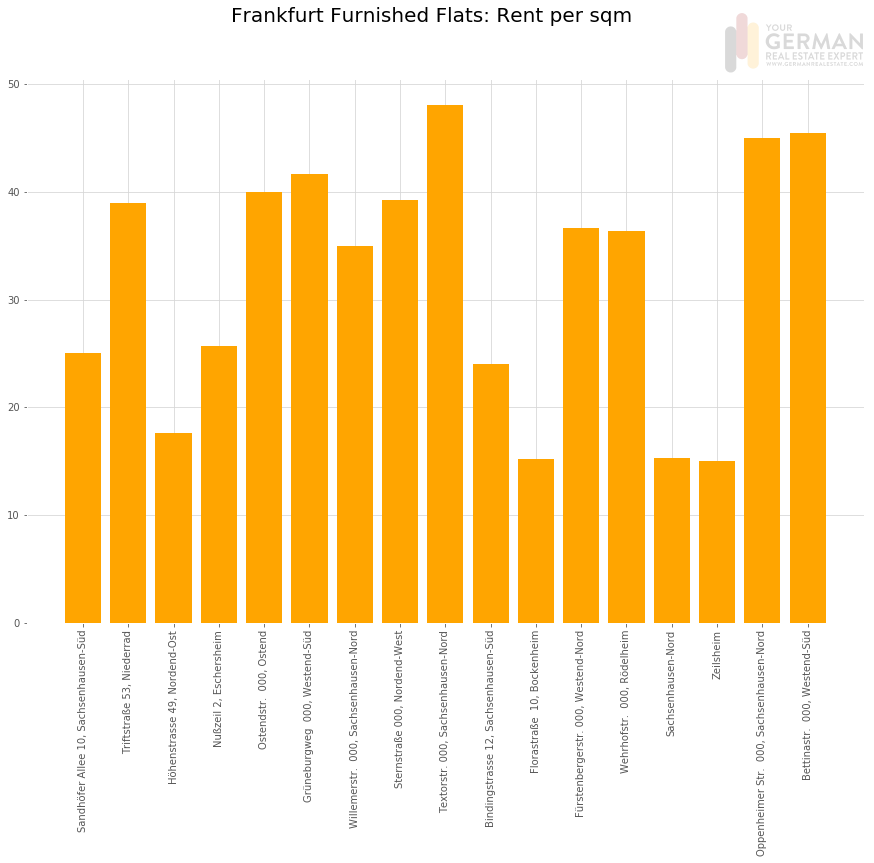

In [172]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.style.use('ggplot')
fig.set_size_inches(15,10)

x = df['location'].tolist()
y = df['rent_per_sqm'].tolist()
ax.bar(x,y, color = 'orange')

plt.xticks(rotation = 'vertical')

ax.set_facecolor(color = 'white')
ax.grid(color = '#d6d6d6', axis = 'both')

logo = plt.imread('theGermanExpert-logo-black.png')
ax.figure.figimage(logo, 720, 790, alpha=.15, zorder=1)
fig.suptitle('Frankfurt Furnished Flats: Rent per sqm', fontsize = 20)
fig.savefig('furnished_in_frankfurt', bbox_inches = 'tight', dpi = 500, transparent=False)
"""
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Price per sqm in EUR', fontsize = 15)
ax.set_title('Average Purchase Price Per SQM')
"""
"""
# rent overview
x1 = df_rents.index.tolist()
y1 = df_rents['Frankfurt_rent'].tolist()
z1 = df_rents['Gallus_rent'].tolist()
ax[1].plot(x1,y1, color = 'grey')
ax[1].plot(x1,z1, color = 'orange')

ax[1].set_xlabel('Year', fontsize = 15)
ax[1].set_ylabel('Rent per sqm in EUR', fontsize = 15)
ax[1].set_title('Average Rent Per SQM', fontsize = 15)

rcParams['axes.titlepad'] = 20
rcParams['axes.labelpad'] =20

#legend

ax[0].legend(['Frankfurt City', 'Gallus'])
ax[1].legend(['Frankfurt City', 'Gallus'])

#labels
ax[0].set_xticks(np.arange(min(x), max(x)+1, 1.0))
ax[1].set_xticks(np.arange(min(x), max(x)+1, 1.0))
x_labels = ['q4 2015', 'q4 2016', 'q4 2017', 'q2 2018']
ax[0].set_xticklabels(x_labels)
ax[1].set_xticklabels(x_labels)

# graphic title

fig.suptitle('Growth Comparison: Gallus Quarter vs. Frankfurt City Proper', fontsize = 20)


# coloring area

ax[0].set_facecolor(color = 'white')
ax[1].set_facecolor(color = 'white')
ax[0].grid(color = '#d6d6d6', axis = 'both')
ax[1].grid(color = '#d6d6d6', axis = 'both')

# logo placement
logo = plt.imread('theGermanExpert-logo-black.png')
ax[1].figure.figimage(logo, 740, 85, alpha=.15, zorder=1)
fig.savefig('gallus_growth_comparison.png', bbox_inches = 'tight', dpi = 500, transparent=False)
"""